# **7 주가예측방법**
additional Method

by 생활 속 문제를 통해 배워보는 머신러닝

## 1. **기본적인 통계적 분석**
1. Pandas를 활용
1. statesmodels을 활용
1. scikit-learn을 활용

<br>
### **01 Pandas Data Settings**
판다스 데이터셋에 함수 적용하기

### **Import DataSet**
판다스 데이터셋에 함수 적용하기

In [1]:
from sklearn.datasets import load_iris 
data = load_iris()

In [2]:
import pandas as pd
df = pd.DataFrame(data.data)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['class'] = [data.target_names[no]   for no in data.target]
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [3]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<br>
### **02 map**
**Series** 개별 객체를 **{dict}** 을 사용하여 치환한다

In [4]:
txt_name = ['SET', 'VER', 'VIR']
map_text = {txt : txt_name[no]  for no, txt in enumerate(data.target_names)}

In [5]:
df['class'] = df['class'].map(map_text)
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,SET
1,4.9,3.0,1.4,0.2,SET
2,4.7,3.2,1.3,0.2,SET


<br>
### **03 apply**
**Series** 개별 객체를 **함수** 를 사용하여 치환한다

In [6]:
df['class'] = df['class'].apply(lambda x : x.lower())
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,set
1,4.9,3.0,1.4,0.2,set
2,4.7,3.2,1.3,0.2,set


In [7]:
'text'.upper()

'TEXT'

<br>
### **04 applymap**
**DataFrame** 전체 셀에 **함수** 를 적용한다

In [8]:
isinstance

<function isinstance(obj, class_or_tuple, /)>

In [9]:
# isinstance 
import numpy as np
df.applymap(lambda v : np.log(v)  if isinstance(v, float)  else  v).head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,1.629241,1.252763,0.336472,-1.609438,set
1,1.589235,1.098612,0.336472,-1.609438,set
2,1.547563,1.163151,0.262364,-1.609438,set
3,1.526056,1.131402,0.405465,-1.609438,set
4,1.609438,1.280934,0.336472,-1.609438,set


<br>
### **05 groupby**
**DataFrame** 전체 셀에 **함수** 를 적용한다

In [10]:
df.groupby('class').mean()

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
set,5.006,3.418,1.464,0.244
ver,5.936,2.770,4.260,1.326
vir,6.588,2.974,5.552,2.026


In [11]:
df.groupby('class').describe().T

class                     set        ver        vir
petal_length count  50.000000  50.000000  50.000000
             mean    1.464000   4.260000   5.552000
             std     0.173511   0.469911   0.551895
             min     1.000000   3.000000   4.500000
             25%     1.400000   4.000000   5.100000
             50%     1.500000   4.350000   5.550000
             75%     1.575000   4.600000   5.875000
             max     1.900000   5.100000   6.900000
petal_width  count  50.000000  50.000000  50.000000
             mean    0.244000   1.326000   2.026000
             std     0.107210   0.197753   0.274650
             min     0.100000   1.000000   1.400000
             25%     0.200000   1.200000   1.800000
             50%     0.200000   1.300000   2.000000
             75%     0.300000   1.500000   2.300000
             max     0.600000   1.800000   2.500000
sepal_length count  50.000000  50.000000  50.000000
             mean    5.006000   5.936000   6.588000
             std     0.352490   0.516171   0.635880
             min     4.300000   4.900000   4.900000
             25%     4.800000   5.600000   6.225000
             50%     5.000000   5.900000   6.500000
             75%     5.200000   6.300000   6.900000
             max     5.800000   7.000000   7.900000
sepal_width  count  50.000000  50.000000  50.000000
             mean    3.418000   2.770000   2.974000
             std     0.381024   0.313798   0.322497
             min     2.300000   2.000000   2.200000
             25%     3.125000   2.525000   2.800000
             50%     3.400000   2.800000   3.000000
             75%     3.675000   3.000000   3.175000
             max     4.400000   3.400000   3.800000

In [12]:
df.groupby('petal_width')['class'].unique().to_frame()

,class
petal_width,
0.1,[set]
0.2,[set]
0.3,[set]
0.4,[set]
0.5,[set]
0.6,[set]
1.0,[ver]
1.1,[ver]
1.2,[ver]


In [13]:
df.groupby('class')['petal_width']\
    .agg({'delta':lambda x : x.max() - x.min(), 'max':np.max, 'min':np.min})

/home/markbaum/Python/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,delta,max,min
class,,,
set,0.5,0.6,0.1
ver,0.8,1.8,1.0
vir,1.1,2.5,1.4


<br>
### **06 Statsmodels**
https://www.statsmodels.org/stable/examples/index.html
1. 가장 통계에 적합한 모듈
1. 해당 페이지의 예제만 활용하면 충분하다 (영어라서 문제..)

Text(0.5,1.2,'Setosa Sepal Width vs. Sepal Length')

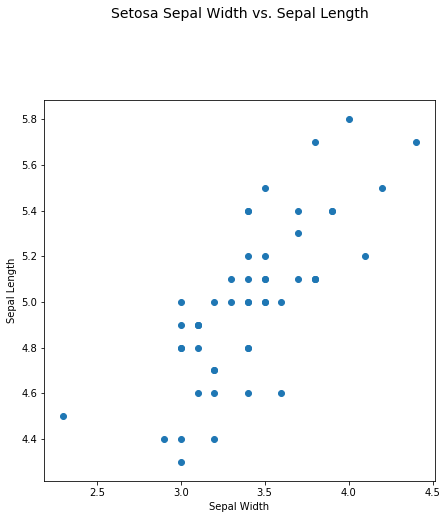

In [14]:
# Setosa 품종의 꽃받침 길이와 너비관계를 선형회귀 모델을 만든다
%matplotlib inline

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(df['sepal_width'][:50], df['sepal_length'][:50])
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')
ax.set_title('Setosa Sepal Width vs. Sepal Length', fontsize=14, y=1.2)

In [15]:
# 데이터 분포를 살펴본결과 선형을 볼 수 있다
# statsmodels 을 사용하여 선형회귀 모델로 검증한다
import statsmodels.api as sm

y = df['sepal_length'][:50]
x = df['sepal_width'][:50]
X = sm.add_constant(x)

/home/markbaum/Python/python/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [16]:
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     60.52
Date:                Thu, 07 Jun 2018   Prob (F-statistic):           4.75e-10
Time:                        15:01:44   Log-Likelihood:                 2.0879
No. Observations:                  50   AIC:                           -0.1759
Df Residuals:                      48   BIC:                             3.648
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.6447      0.305      8.660      

In [17]:
# R-squared : R제곱이 큰만큼 모델의 신뢰성이 높다
# 절편값(const) 은 2.6447 로 P-value값 표준편차값이 일정해 신뢰성이 높다. 대신 정규성은 낮음
# 기울기(sepal_width) 는 0.6909 로 P-value 값과 신뢰구간이 좋아서 일정해 신뢰성 높다. 여기도 정규성은 낮다

 **둘 다 값이 작을 수록 올바른 모형에 가깝다.** [개념정리된 블로그](https://datascienceschool.net/view-notebook/bfe4438b46674c68a5ba6598147a5527/)
### **AIC (Akaike Information Criterion)**
AIC는 모형과 데이터의 확률 분포 사이의 Kullback-Leibler 수준을 가장 크게하기 위한 시도에서 나왔다
$$ AIC = - 2 \log L + 2K $$
### **BIC (Bayesian Information Criterion)** 
BIC는 데이터가 exponential family라는 가정하에 주어진 데이터에서 모형의 likelihood를 측정하기 위한 값에서 유도되었다
$$ BIC = − 2 \log L + K \log n $$

### **Likelihood 우도값 개념** 
[우도의 개념과 추정](http://to302.phps.kr/wordpress/?p=63)
1. 확률 : 특정한 포인트를 찍어서 계산을 한다
1. 우도 : 특정한 관찰값이 이미 주어져 있고, 확률분포곡선 자체를 움직이면서 그 관찰값이 가장 잘 나오는 위치를 찾는 것이다
1. 특정 확률분포를 사용해 우도를 구하고, 그 분포를 약간 이동시켜 계산하고… 반복하다가 그 우도가 최대로 결정되는 지점에서 멈추는 것이다. 어쩐지 프로그래밍 기초에서 나오는 것과 유사하다

### **OLS(최소자승법)** 
[우도의 개념과 추정](http://to302.phps.kr/wordpress/?p=63)
1. Sum of Square를 최소화하는 것이 가장 좋은 회귀직선이라 정한 것 뿐이지, 그게 정말 맞다고 누가 장담할 수 있나? 
1. 그렇게 하기로 한 것 뿐이지. 아니 – 넓게 말하면 최소자승법 역시 하나의 최대우도추정이라고 할 수도 있는 것이다.

## **이를 근거로 회귀식을 구현한다**

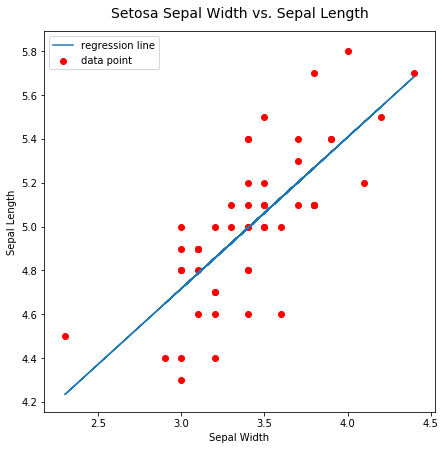

In [18]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x, results.fittedvalues, label='regression line')
ax.scatter(x, y, label='data point', color='r')
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')
ax.set_title('Setosa Sepal Width vs. Sepal Length', fontsize=14, y=1.02)
ax.legend()

<br>
### **07 scikit-learn**
http://scikit-learn.org/stable/tutorial/index.html

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

/home/markbaum/Python/python/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
clf = RandomForestClassifier(max_depth=5, n_estimators=10)
X = df.iloc[:,:4]
y = df.iloc[:, 4]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
y_predict = clf.predict(X_test)
rf = pd.DataFrame(list(zip(y_predict, y_test)), columns=['predicted', 'actual'])
rf['correct'] = rf.apply(lambda x : 1   if x['predicted'] == x['actual']   else 0, axis=1 )
rf[::9]

,predicted,actual,correct
0,vir,vir,1
9,set,set,1
18,ver,ver,1
27,set,set,1
36,ver,ver,1


In [22]:
# 예측의 정확도 수치로 출력
rf['correct'].sum() / rf['correct'].count()

0.9333333333333333

([<matplotlib.axis.XTick at 0x7f7b5313c780>,
 <a list of 4 Text xticklabel objects>)

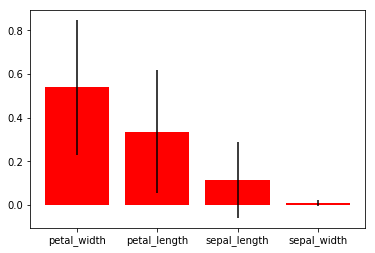

In [23]:
f_importances = clf.feature_importances_
f_names = df.columns[:4]
f_std = np.std( [ tree.feature_importances_ 
                  for tree in clf.estimators_ ],  axis = 0 )

zz  = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key=lambda x: x[0], reverse=True)

imps   = [x[0] for x in zzs]
labels = [x[1] for x in zzs]
errs   = [x[2] for x in zzs]

plt.bar(range(len(f_importances)), 
        imps, color="r", yerr=errs, align="center")
plt.xticks(range(len(f_importances)), labels)

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split

clf = OneVsRestClassifier(SVC(kernel='linear'))

X = df.iloc[:,:4]
y = np.array(df.iloc[:,4]).astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
rf     = pd.DataFrame(list(zip(y_pred, y_test)), columns=['predicted', 'actual'])
rf['correct'] = rf.apply(lambda r: 1 if r['predicted'] == r['actual'] else 0, axis=1)  
rf.head()

In [24]:
rf['correct'].sum() / rf['correct'].count()

0.9333333333333333

<br><br>
## **2 로지스틱 회귀를 이용하여 IPO 시장 예측하기**
IPO 시장 예측하기

In [25]:
# from pandas_datareader import get_data_yahoo
# spy_data = get_data_yahoo('spy', '2000-01-01')
# spy_data.to_csv('./data/spy_data.csv', encoding='ms949')

In [26]:
import pandas as pd
spy_data = pd.read_csv('./data/spy_data.csv')
spy_data = spy_data.set_index('Date')
spy_data.index = pd.DatetimeIndex(spy_data.index)
spy_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2122 entries, 2009-12-31 to 2018-06-06
Data columns (total 6 columns):
High         2122 non-null float64
Low          2122 non-null float64
Open         2122 non-null float64
Close        2122 non-null float64
Volume       2122 non-null float64
Adj Close    2122 non-null float64
dtypes: float64(6)
memory usage: 116.0 KB


In [27]:

spy_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,112.800003,111.389999,112.769997,111.440002,90637900.0,94.356773
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,95.957069
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,96.211037
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,96.278809
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,96.685219


<br><br>
## **3 머신러닝으로 주가예측**
Red Queen의 경주 : 적에 가득찬 상황에서 변화에 뒤쳐지지 않기위해 경쟁에 참여하는 것으로, 백신을 개발하면 박테리아가 방어를 발전하는 경우를 의미한다

<br>
### **01 기본개념**
Red Queen의 경주 : 적에 가득찬 상황에서 변화에 뒤쳐지지 않기위해 경쟁에 참여하는 것으로, 백신을 개발하면 박테리아가 방어를 발전하는 경우를 의미한다

### 효율적 시장가설(efficient Market Hypothesis) 에 근어하여, 모든 정보가 주가에 적절하게 반영됨을 전제로 한다
1. 약형 (weak form) : 일부 시장에 한해 기술적 분석이 유용하다
1. 준강형 (semi-strong form) : 주식의 모든 공개정보가 편향되지 않게 가격에 반영된다
1. 강형 (strong form) : 공개 비공개 모든 정보가 가격에 반영된다

### 모멘텀 전략 Momentum Strategy
1. 과거 가격데이터를 수익률에 따라 순위를 매기고서 상위 순위 주식을 매수하고, 일정기간후 매도 후 이를 반복한다
1. 코스피 200 종목 중, 실적상위 25개의 종목을 매수 후 1년뒤 되파는 과정을 반복한다

<br>
### **02 주가 데이터 불러오기**
get_data_yahoo

In [28]:
# from pandas_datareader import get_data_yahoo
# spy_data = get_data_yahoo('SPY', '2010-01-01', '2018-06-06')
# spy_data.to_csv('./data/spy_data.csv')

import pandas as pd
spy = pd.read_csv('./data/spy_data.csv')
spy = spy.set_index('Date')
spy.index = pd.DatetimeIndex(spy_data.index)
spy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2122 entries, 2009-12-31 to 2018-06-06
Data columns (total 6 columns):
High         2122 non-null float64
Low          2122 non-null float64
Open         2122 non-null float64
Close        2122 non-null float64
Volume       2122 non-null float64
Adj Close    2122 non-null float64
dtypes: float64(6)
memory usage: 116.0 KB


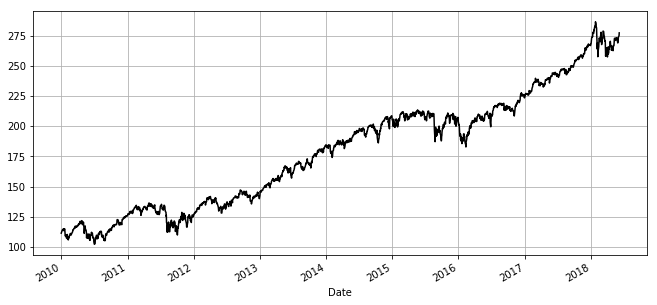

In [29]:
spy_c = spy['Close']

%matplotlib inline
import matplotlib.pyplot as plt
spy_c.plot(color='k', figsize=(11,5), grid=True)

<br>
### **03 거래 전략 개발하기 **
일간 변동데이터 추출하기

In [30]:
# 최초 Open 가격
first_open = spy['Open'].iloc[0]
first_open

112.7699966430664

In [31]:
# 마지막 Close 종가
last_close = spy['Close'].iloc[-1]
last_close

277.39999389648443

In [32]:
# 전체 기간의 변화값
last_close - first_open

164.62999725341803

In [33]:
# 일간 변화량을 별도의 컬럼으로 생성한다
import pandas as pd
spy['Daily Change'] = pd.Series(spy['Close'] - spy['Open'])
spy['Daily Change'].sum()

61.29996490478476

In [34]:
# 표준편차를 계산한다
import numpy as np
np.std(spy['Daily Change'])

1.2544524712059741

<br>
### **03-2 거래 전략 개발하기**
장외 시간거래 데이터를 추출한다

In [35]:
# 전날 종가와 당일 시초가 차이를 계산한다
# 장외 시간매매 가격변화를 계산한다
spy['Overnight Change'] = pd.Series(spy['Open'] - spy['Close'].shift(1))
spy['Overnight Change'].sum()

103.33003234863327

In [36]:
np.std(spy['Overnight Change'])

0.9100947619719011

In [37]:
# 결과해석
# 평일 거래에 비해
# 시간외 거래의 평균가격 상승률이 낮음을 알 수 있다

<br>
### **03-3 거래 전략 비교하기**
1. 일일 수익률의 분석 (장마감 - 장마감)
1. 당일 수익률의 분석 (장시작 - 장마감)
1. 장외 수익률의 분석 (장마감 - 익일 장시장)

<br>
### **세가지 전략의 히스토그램 출력하기**
시각화를 이용한 분석

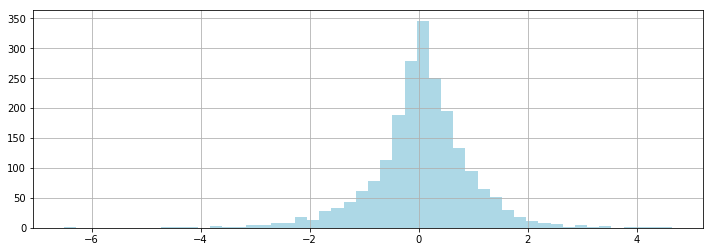

In [38]:
# 당일과 전날의 종가비교
# daily returns
daily_rtn = ((spy['Close'] - spy['Close'].shift(1))/spy['Close'].shift(1))*100
daily_rtn.hist(bins=50, color='lightblue', figsize=(12,4))

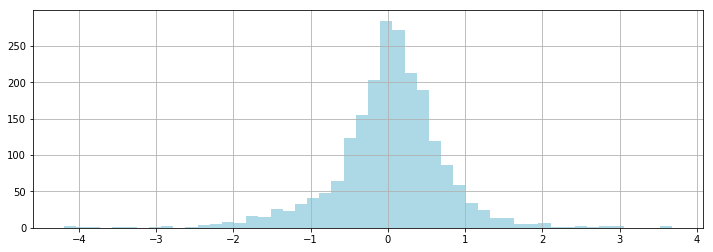

In [39]:
# 당일의 시초가와 종가 비교
# intra day returns
id_rtn = ((spy['Close'] - spy['Open'])/spy['Open'])*100
id_rtn.hist(bins=50, color='lightblue', figsize=(12,4))

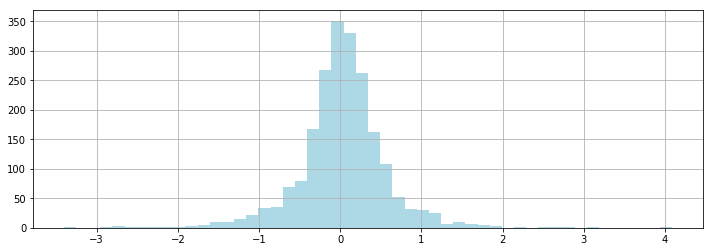

In [40]:
# 시간외 가격변화 비교
# overnight returns
on_rtn = ((spy['Open'] - spy['Close'].shift(1))/spy['Close'].shift(1))*100
on_rtn.hist(bins=50, color='lightblue', figsize=(12,4))

<br>
### **04 다양한 금융지표를 사용한 거래 전략 비교하기**
Sharpe ratio
1. 일일 수익률의 분석 (장마감 - 장마감)
1. 당일 수익률의 분석 (장시작 - 장마감)
1. 장외 수익률의 분석 (장마감 - 익일 장시장)

In [41]:
def get_stats(s, n=252):
    import pandas as pd
    s         = s.dropna()
    cnt       = len(s)
    wins      = len(s[s>0])
    losses    = len(s[s<0])
    evens     = len(s[s==0])
    mean_Up   = round(s[s>0].mean(), 3)
    mean_Down = round(s[s<0].mean(), 3)
    win_rate  = round(wins/losses, 3)
    mean_trd  = round(s.mean(), 3)
    sd        = round(np.std(s), 3)
    max_Down  = round(s.min(), 3)
    max_Up    = round(s.max(), 3)
    sharpe_r  = round((s.mean()/np.std(s))*np.sqrt(n), 4)
    result    = [cnt, wins, losses, evens, win_rate, mean_Up, mean_Down,
                mean_trd, sd, max_Down, max_Up, sharpe_r]
    index_name = ['Trades','Wins', 'Losses', 'Breakeven', 'Win/Loss Ratio', 'Mean Win',\
                  'Mean Loss', 'Mean', 'Std Dev', 'Max Loss', 'Max Win', 'Sharpe Ratio']
    return pd.Series(result, index=index_name)

In [42]:
report_stock = pd.concat([get_stats(daily_rtn), get_stats(id_rtn), get_stats(on_rtn)], axis=1)
report_stock.columns = ['일간종가비교', '당일가격변화', '시간외거래']
report_stock.T

,Trades,Wins,Losses,Breakeven,Win/Loss Ratio,Mean Win,Mean Loss,Mean,Std Dev,Max Loss,Max Win,Sharpe Ratio
일간종가비교,2121.0,1164.0,948.0,9.0,1.228,0.632,-0.670,0.047,0.935,-6.512,4.650,0.8048
당일가격변화,2122.0,1160.0,945.0,17.0,1.228,0.478,-0.542,0.020,0.723,-4.196,3.683,0.4386
시간외거래,2121.0,1136.0,948.0,37.0,1.198,0.379,-0.395,0.027,0.561,-3.406,4.090,0.7547


In [43]:
# 결과해석
# 표준편차와 평균수익률이 높은 전략을 선택한다
# 비슷한 평균수익률을 갖는경우 샤프지수를 비교해서 전략을 선택한다
# 돈 잃을 위험을 1을 기준으로, 초과 수익률을 측정한다

# 이번 종목의 분석 결과에서는 
# Mean Win, Std Dev, Sharp 모두 종가를 비교한 분석이 압도적으로 유리하다

<br>
### **05 주가분석 기간의 확대**
장기간 데이터를 대상으로 주가분석을 시행하기

In [44]:
# from pandas_datareader import get_data_yahoo
# spy = get_data_yahoo('SPY', '2000-01-01', '2018-06-06')
# spy.to_csv('./data/spy_longperiod.csv')
# spy.tail(3)

import pandas as pd
sp = pd.read_csv('./data/spy_longperiod.csv', index_col='Date')
sp.index = pd.DatetimeIndex(sp.index)
sp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4637 entries, 1999-12-31 to 2018-06-06
Data columns (total 6 columns):
High         4637 non-null float64
Low          4637 non-null float64
Open         4637 non-null float64
Close        4637 non-null float64
Volume       4637 non-null float64
Adj Close    4637 non-null float64
dtypes: float64(6)
memory usage: 253.6 KB


Text(0.5,1,'SPY')

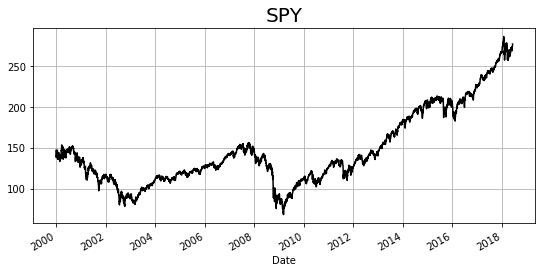

In [45]:
fig, ax = plt.subplots(figsize=(9,4))
sp['Close'].plot(color='k')
plt.grid()
plt.title("SPY", fontsize=20)

In [46]:
# 
long_day_rtn = ((sp['Close'] - sp['Close'].shift(1))/sp['Close'].shift(1))*100
(sp['Close'] - sp['Close'].shift(1)).sum()

130.52499389648443

In [47]:
long_id_rtn = ((sp['Close'] - sp['Open'])/sp['Open'])*100
(sp['Close'] - sp['Open']).sum()

-17.61116027832037

In [48]:
long_on_rtn = ((sp['Open'] - sp['Close'].shift(1))/sp['Close'].shift(1))*100
(sp['Open'] - sp['Close'].shift(1)).sum()

148.167449951172

In [49]:
report_stock_long = pd.concat([get_stats(long_day_rtn), get_stats(long_id_rtn), get_stats(long_on_rtn)], axis=1)
report_stock_long.columns = ['일간종가비교', '당일가격변화', '시간외거래']
report_stock_long.T

,Trades,Wins,Losses,Breakeven,Win/Loss Ratio,Mean Win,Mean Loss,Mean,Std Dev,Max Loss,Max Win,Sharpe Ratio
일간종가비교,4636.0,2487.0,2131.0,18.0,1.167,0.774,-0.858,0.021,1.219,-9.845,14.520,0.2753
당일가격변화,4637.0,2438.0,2163.0,36.0,1.127,0.646,-0.724,0.002,1.008,-8.991,8.435,0.0298
시간외거래,4636.0,2467.0,2106.0,63.0,1.171,0.415,-0.444,0.019,0.660,-8.322,6.068,0.4593


In [50]:
## 장기간을 분석한 결과 비교하기
# 단순히 장중거래 SPY ETF에 투자시 손해를 볼 확률이 높다 
# 평균과 표준편차는 종가비교가 유리하다
# 하지만 Sharp Ratio를 비교한 결과 종가거래를한 경우가 수익률이 가장 양호한 결과를 보여준다

<br>
### **06 서포트 백터 회귀모델  만들기**
장기간 데이터를 대상으로 주가분석을 시행하기

#### **20일간의 종가비교를 위한 데이터 만들기**
20일간의 비교데이터를 1줄로 만들기

In [51]:
# 20일간의 종가를 비교한다
for i in range(1, 21, 1):
    sp.loc[:,'Close Minus ' + str(i)] = sp['Close'].shift(i)
sp.head(3)

,High,Low,Open,Close,Volume,Adj Close,Close Minus 1,Close Minus 2,Close Minus 3,Close Minus 4,...,Close Minus 11,Close Minus 12,Close Minus 13,Close Minus 14,Close Minus 15,Close Minus 16,Close Minus 17,Close Minus 18,Close Minus 19,Close Minus 20
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,147.5000,146.250000,146.843704,146.8750,3172700.0,104.415031,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,148.2500,143.875000,148.250000,145.4375,8164300.0,103.393074,146.8750,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,144.0625,139.640594,143.531204,139.7500,8089800.0,99.349785,145.4375,146.875,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# 이전의 20일간의 종가 비교내용을 1줄로 보여준다
sp20 = sp[[x for x in sp.columns if 'Close Minus' in x or x == 'Close']].iloc[20:,]
sp20.head(3)

,Close,Close Minus 1,Close Minus 2,Close Minus 3,Close Minus 4,Close Minus 5,Close Minus 6,Close Minus 7,Close Minus 8,Close Minus 9,...,Close Minus 11,Close Minus 12,Close Minus 13,Close Minus 14,Close Minus 15,Close Minus 16,Close Minus 17,Close Minus 18,Close Minus 19,Close Minus 20
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,139.5625,135.8750,140.2500,140.8125,141.9375,140.343704,144.437500,144.750000,147.0000,145.8125,...,145.000000,143.062500,144.5000,146.2500,145.75,137.75,140.00,139.75,145.4375,146.8750
2000-02-01,140.9375,139.5625,135.8750,140.2500,140.8125,141.937500,140.343704,144.437500,144.7500,147.0000,...,146.968704,145.000000,143.0625,144.5000,146.25,145.75,137.75,140.00,139.7500,145.4375
2000-02-02,141.0625,140.9375,139.5625,135.8750,140.2500,140.812500,141.937500,140.343704,144.4375,144.7500,...,145.812500,146.968704,145.0000,143.0625,144.50,146.25,145.75,137.75,140.0000,139.7500


In [53]:
sp20 = sp20.iloc[:, ::-1]
sp20.head(3)

,Close Minus 20,Close Minus 19,Close Minus 18,Close Minus 17,Close Minus 16,Close Minus 15,Close Minus 14,Close Minus 13,Close Minus 12,Close Minus 11,...,Close Minus 9,Close Minus 8,Close Minus 7,Close Minus 6,Close Minus 5,Close Minus 4,Close Minus 3,Close Minus 2,Close Minus 1,Close
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,146.8750,145.4375,139.75,140.00,137.75,145.75,146.2500,144.5000,143.062500,145.000000,...,145.8125,147.0000,144.750000,144.437500,140.343704,141.9375,140.8125,140.2500,135.8750,139.5625
2000-02-01,145.4375,139.7500,140.00,137.75,145.75,146.25,144.5000,143.0625,145.000000,146.968704,...,147.0000,144.7500,144.437500,140.343704,141.937500,140.8125,140.2500,135.8750,139.5625,140.9375
2000-02-02,139.7500,140.0000,137.75,145.75,146.25,144.50,143.0625,145.0000,146.968704,145.812500,...,144.7500,144.4375,140.343704,141.937500,140.812500,140.2500,135.8750,139.5625,140.9375,141.0625


#### **SVC를 활용하여 모델을 학습하기**
Support Vector Machine

In [54]:
## GitHub 소스내용
## 데이터 셋 나누기
# X_train = sp20[:-2000]
# y_train = sp20['Close'].shift(-1)[:-2000]

# X_test = sp20[-2000:-1000]
# y_test = sp20['Close'].shift(-1)[-2000:-1000]
# len(sp20)

In [55]:
## Book 의 내용
# 데이터 셋 나누기
X_train = sp20[:-1500]
y_train = sp20['Close'].shift(-1)[:-1500]

X_test = sp20[-1500:]
y_test = sp20['Close'].shift(-1)[-1500:]
len(sp20)

4617

In [56]:
from sklearn.svm import SVR

clf   = SVR(kernel='linear')
model = clf.fit(X_train, y_train)
preds = model.predict(X_test)
print(preds.shape)
preds[:10]

(1500,)


array([135.48889369, 132.85928217, 133.42516324, 131.26916666,
       132.07519674, 133.31918418, 133.02392063, 136.13882813,
       136.45559241, 137.47949473])

In [57]:
# SVC 모델로 예측한 값과, 실제값을 비교한다
tf = pd.DataFrame(list(zip(y_test, preds)), 
                  columns = ['Next Day Close', 'Predicted Next Close'], 
                  index   = y_test.index)
tf.head(3)

,Next Day Close,Predicted Next Close
Date,,
2012-06-20,132.440002,135.488894
2012-06-21,133.460007,132.859282
2012-06-22,131.320007,133.425163


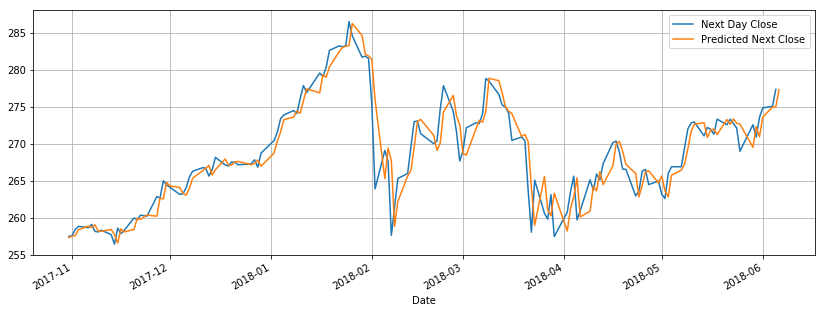

In [58]:
tf.iloc[-150:,:].plot(figsize=(14,5), grid=True)

#### **SVC 모델을 평가하기**
Support Vector Machine

In [59]:
# # GitHub Codes
# cdc = sp[['Close']].iloc[-2000:-1000]
# ndo = sp[['Open']].iloc[-2000:-1000].shift(-1)

In [60]:
# Book Codes
cdc = sp[['Close']].iloc[-1500:]
ndo = sp[['Open']].iloc[-1500:].shift(-1)

In [61]:
# 전략 : 다음날 종가가 상승이 예측되면, 당일 매수를 한다
tf1 = pd.merge(tf,  cdc, left_index=True, right_index=True)
tf2 = pd.merge(tf1, ndo, left_index=True, right_index=True)
tf2.columns = ['Next Day Close', 'Predicted Next Close', 'Current Day Close', 'Next Day Open']
tf2.head(3)

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open
Date,,,,
2012-06-20,132.440002,135.488894,135.479996,135.639999
2012-06-21,133.460007,132.859282,132.440002,133.130005
2012-06-22,131.320007,133.425163,133.460007,132.050003


In [62]:
# 이익 손해 시그널을 표기한다
def get_signal(r):
    if r['Predicted Next Close'] > r['Next Day Open'] + 1: return 0
    else: return 1

# 이익률 손해율 시그널을 표시한다
def get_ret(r):
    if r['Signal'] == 1:
        return ((r['Next Day Close'] - r['Next Day Open'])/r['Next Day Open']) * 100
    else: return 0

tf2['Signal'] = tf2.apply(get_signal, axis=1)
tf2['PnL']    = tf2.apply(get_ret,    axis=1)
tf2.head(3)

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open,Signal,PnL
Date,,,,,,
2012-06-20,132.440002,135.488894,135.479996,135.639999,1,-2.359184
2012-06-21,133.460007,132.859282,132.440002,133.130005,1,0.247879
2012-06-22,131.320007,133.425163,133.460007,132.050003,0,0.000000


In [63]:
(tf2[tf2['Signal']==1]['Next Day Close'] - tf2[tf2['Signal']==1]['Next Day Open']).sum()

46.28010559081986

In [64]:
(sp['Close'].iloc[-2000:-1000] - sp['Open'].iloc[-2000:-1000]).sum()

43.400085449218665

In [65]:
get_stats((sp['Close'].iloc[-2000:-1000] - sp['Open'].iloc[-2000:-1000])/sp['Open'].iloc[-2000:-1000] * 100)

Trades            1000.0000
Wins               568.0000
Losses             428.0000
Breakeven            4.0000
Win/Loss Ratio       1.3270
Mean Win             0.4950
Mean Loss           -0.5800
Mean                 0.0330
Std Dev              0.7390
Max Loss            -3.9770
Max Win              3.6830
Sharpe Ratio         0.7069
dtype: float64

In [66]:
get_stats(tf2['PnL'])

# 분석결과 
# 상승에 비해 하락값도 커서 전략이 좋지않다

Trades            1499.0000
Wins               747.0000
Losses             598.0000
Breakeven          154.0000
Win/Loss Ratio       1.2490
Mean Win             0.3950
Mean Loss           -0.4450
Mean                 0.0190
Std Dev              0.5680
Max Loss            -4.1960
Max Win              2.2060
Sharpe Ratio         0.5403
dtype: float64

<br>
### **07 동적 시간 워핑 모델링 서포트 백터 회귀모델  만들기**
장기간 데이터를 대상으로 주가분석을 시행하기

#### **평균 회귀적 추세경향을 분석 해보자**
Mean Reversion

In [67]:
from scipy.spatial.distance import euclidean

In [68]:
from data.fastdtw import fastdtw

In [69]:
def dtw_dist(x,y):
    distance, path = fastdtw(x, y, dist=euclidean)
    return distance

In [71]:
tseries = []
tlen = 5
for i in range(tlen, len(sp), tlen):
    pctc = sp['Close'].iloc[i-tlen:i].pct_change()[1:].values * 100
    res = sp['Close'].iloc[i-tlen:i+1].pct_change()[-1] * 100
    tseries.append((pctc, res))
len(tseries)

927

In [72]:
tseries[0]

(array([-0.9787234 , -3.91061453,  0.17889088, -1.60714286]),
 5.807622504537213)

In [74]:
dist_pairs = []
for i in range(len(tseries)):
    for j in range(len(tseries)):
        dist = dtw_dist(tseries[i][0], tseries[j][0])
        dist_pairs.append((i,j,dist,tseries[i][1], tseries[j][1]))

In [75]:
dist_frame = pd.DataFrame(dist_pairs, columns=['A','B','Dist', 'A Ret', 'B Ret'])

In [76]:
sf = dist_frame[dist_frame['Dist']>0].sort_values(['A','B']).reset_index(drop=1)

In [77]:
sfe = sf[sf['A']<sf['B']]

In [78]:
winf = sfe[(sfe['Dist']<=1)&(sfe['A Ret']>0)]
winf

,A,B,Dist,A Ret,B Ret
958,1,33,0.625540,1.357727,0.102594
4689,5,60,0.819511,0.585849,2.034602
20522,22,151,0.730117,0.211372,-0.032236
21004,22,633,0.738643,0.211372,0.501370
24174,26,99,0.899151,0.980628,-1.465515
24258,26,183,0.799945,0.980628,1.340695
24264,26,189,0.638684,0.980628,0.352712
24267,26,192,0.827140,0.980628,-0.216998
24288,26,213,0.644299,0.980628,-0.320981
24308,26,233,0.970981,0.980628,-0.825481


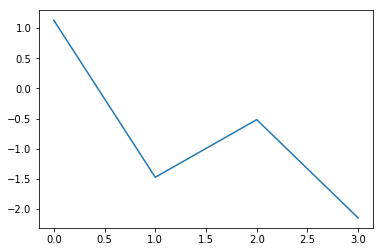

In [79]:
plt.plot(np.arange(4), tseries[6][0])

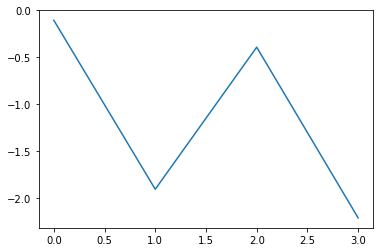

In [80]:
plt.plot(np.arange(4), tseries[598][0])

In [84]:
excluded = {}
return_list = []
def get_returns(r):
    if excluded.get(r['A']) is None:
        return_list.append(r['B Ret'])
        if r['B Ret'] < 0:
            excluded.update({r['A']:1})

winf.apply(get_returns, axis=1);
get_stats(pd.Series(return_list))

Trades            560.0000
Wins              296.0000
Losses            264.0000
Breakeven           0.0000
Win/Loss Ratio      1.1210
Mean Win            0.4760
Mean Loss          -0.4720
Mean                0.0300
Std Dev             0.6580
Max Loss           -2.7530
Max Win             2.6820
Sharpe Ratio        0.7125
dtype: float64